# K-NN Algoritham

### Load the Librery

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### Load the Dataset

In [4]:
dataset=pd.read_csv("Social_Network_Ads.csv")

### Extract top  five data

In [5]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Find the information of dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3)
memory usage: 9.5 KB


### Find the colunmns

In [7]:
dataset.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

### Feature selection

In [8]:
X=dataset[['Age', 'EstimatedSalary']]

### Target / output

In [9]:
y=dataset['Purchased']

### Plot the graph age and EstimatedSaary Releted with Purchased

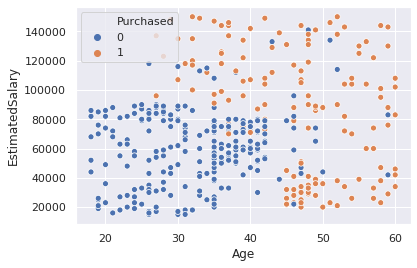

In [10]:
sns.scatterplot(data=dataset,x='Age',y='EstimatedSalary',hue='Purchased')

### Split the data into train and test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

### Load the Neighbors family and import Kneighborsclassifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
model=KNeighborsClassifier(n_neighbors=5)

### Fit the model

In [15]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Predict the model

In [16]:
y_pred=model.predict(X_test)

In [17]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

### Show the y test resault

In [18]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
60     0
79     0
285    1
305    0
281    0
Name: Purchased, Length: 120, dtype: int64

### Find error rate using 1-50 neighbors qnd find the mean 

In [19]:
error_rate=[]
for i in range(1,50):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    error_rate.append(np.mean(y_test != y_pred))

### Plot the error graph

Text(0, 0.5, 'Error')

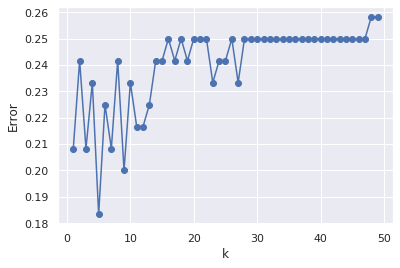

In [20]:
plt.plot(range(1,50),error_rate,marker='o')
plt.xlabel('k')
plt.ylabel('Error')

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test, y_pred)

array([[70,  3],
       [28, 19]])

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test, y_pred)

0.7416666666666667